<a href="https://colab.research.google.com/github/Nada-Elghaweet/Ai-safety-system/blob/CNN_IMGS/CNN_Saftey_IMGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls /content/

 sample_data  'VIOLENCE VS NON_VIOLENCE.zip'


In [2]:
import os
os.rename("/content/VIOLENCE VS NON_VIOLENCE.zip", "/content/VIOLENCE_vs_NON_VIOLENCE.zip")
zip_path = "/content/VIOLENCE_vs_NON_VIOLENCE.zip"

In [3]:
import zipfile
import os
extract_path = '/content/VIOLENCE_vs_NON_VIOLENCE'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
dataset_path = os.path.join(extract_path, 'VIOLENCE VS NON_VIOLENCE')
os.listdir(dataset_path)

['train', 'test', 'val']

In [5]:
train_path = os.path.join(dataset_path, 'train')
val_path   = os.path.join(dataset_path, 'val')
test_path  = os.path.join(dataset_path, 'test')

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [7]:
img_size = (128, 128)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2] ##to simulate diff lighting
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=16,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=16,
    class_mode='binary'
)

Found 700 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


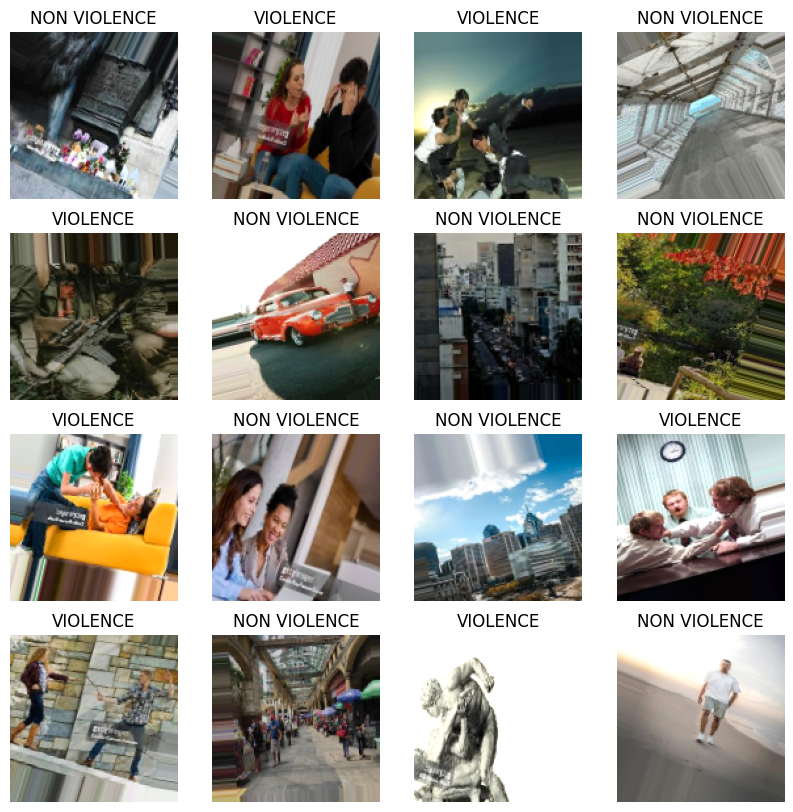

In [8]:
plt.figure(figsize=(10, 10)) #EDA
for i , (img, label) in enumerate(train_generator):
  for j in range(16):
    ax = plt.subplot(4, 4, j+1)
    plt.imshow(img[j])
    plt.axis('off')
    if label[j] == 1:
      plt.title('VIOLENCE')
    else :
      plt.title('NON VIOLENCE')
  break
plt.show()


In [9]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # freeze all layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,621,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,879,681 (18.61 MB)

 Trainable params: 2,621,697 (10.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
history = model.fit(train_generator , validation_data= val_generator , epochs= 7)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 363ms/step - accuracy: 0.5659 - loss: 0.9726 - val_accuracy: 0.7436 - val_loss: 0.5718
Epoch 2/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 318ms/step - accuracy: 0.6854 - loss: 0.6404 - val_accuracy: 0.7436 - val_loss: 0.5149
Epoch 3/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.7492 - loss: 0.5128 - val_accuracy: 0.7564 - val_loss: 0.5056
Epoch 4/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 309ms/step - accuracy: 0.7664 - loss: 0.4903 - val_accuracy: 0.7628 - val_loss: 0.4798
Epoch 5/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 309ms/step - accuracy: 0.7736 - loss: 0.4744 - val_accuracy: 0.7756 - val_loss: 0.4783
Epoch 6/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.7679 - loss: 0.4604 - val_accuracy: 0.7756 - val_loss: 0.4679
Epoch 7/7
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 316ms/step - accuracy: 0.7854 - loss: 0.4396 - val_accuracy: 0.7692 - val_loss: 0.5105


Text(0.5, 1.0, 'Loss Curves')

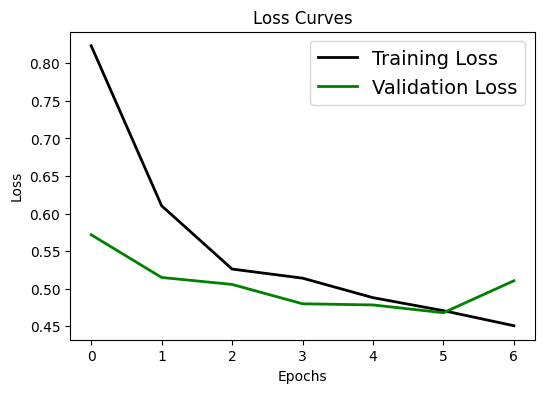

In [12]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'] , fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

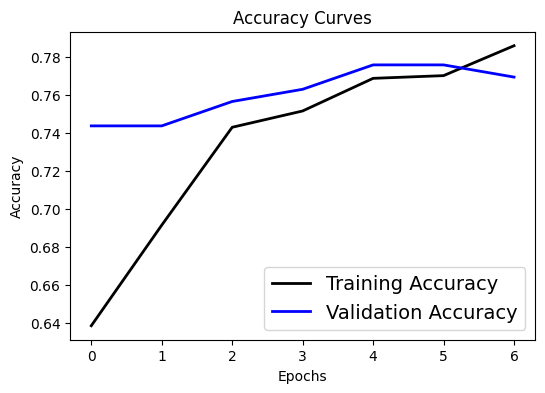

In [13]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

Found 117 images belonging to 2 classes.


In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.8205 - loss: 0.4071
Test Loss: 0.4952831566333771
Test Accuracy: 0.752136766910553


In [16]:
pred_probs = model.predict(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step


In [17]:
pred_labels = []
for prob in pred_probs.flatten():
    if prob > 0.5:
        pred_labels.append("VIOLENCE")
    else:
        pred_labels.append("NON VIOLENCE")

In [18]:
filenames = test_generator.filenames
import pandas as pd
results = pd.DataFrame({
    'filename': filenames,
    'prediction': pred_labels
})

results.to_csv("mobilenet_test_predictions.csv", index=False)
print("Predictions saved!")

Predictions saved!


In [19]:
#preview
for i in range(5):
    print(f"{filenames[i]} --> {pred_labels[i]}")

non_violence/NON_VIOLENCE (100).jpg --> NON VIOLENCE
non_violence/NON_VIOLENCE (104).jpg --> VIOLENCE
non_violence/NON_VIOLENCE (126).jpg --> NON VIOLENCE
non_violence/NON_VIOLENCE (199).jpg --> NON VIOLENCE
non_violence/NON_VIOLENCE (209).jpg --> NON VIOLENCE


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


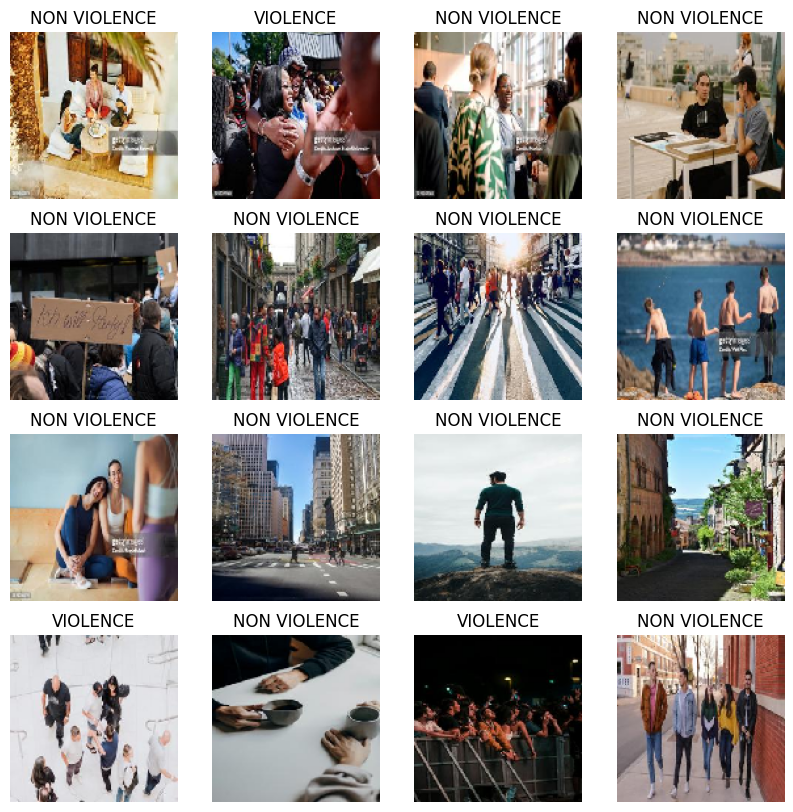

In [20]:
plt.figure(figsize=(10, 10))

count = 0
for images, labels in test_generator:
    preds = model.predict(images)
    for i in range(len(images)):
        plt.subplot(4, 4, count + 1)
        plt.imshow(images[i])
        plt.axis("off")

        if preds[i] > 0.5:
            plt.title("VIOLENCE")
        else:
            plt.title("NON VIOLENCE")
        count += 1
        if count == 16:
            break
    if count == 16:
        break
plt.show()


In [21]:
model.save("mobilenet_model.h5")

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
model.save("/content/drive/MyDrive/mobilenet_model.h5")

In [24]:
from google.colab import files
files.download("mobilenet_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>